In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pickle

import numpy as np
import numpy.lib.recfunctions as rfn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from astropy.table import Table

In [2]:
from palettable.cartocolors.qualitative import Safe_6 

cluster_colors = Safe_6.mpl_colors

In [3]:
import jianbing

from jianbing import hsc
from jianbing import utils
from jianbing import visual
from jianbing import catalog
from jianbing import wlensing

In [4]:
data_dir = jianbing.DATA_DIR

fig_dir = jianbing.FIG_DIR

sim_dir = jianbing.SIM_DIR
bin_dir = jianbing.BIN_DIR
res_dir = jianbing.RES_DIR

### Figure that illustrates the best-fit halo model

In [6]:
# clustering 
clustering = pickle.load(open(os.path.join(jianbing.JB_DIR, "data", "model", "clust.pickle"), "rb"))
clustering_labels = [r"$11$", r"$12$", r"$22$", r"$13$", r"$23$", r"$33$"]
clustering_marker = ["o", "P", "H", "X", "s", "8"]
clustering_lstyle = ["-", "--", "-.", ":", "-", "--"]

In [7]:
# Stellar mass function
smf = pickle.load(open(os.path.join(jianbing.JB_DIR, "data", "model", "smf.pickle"), "rb"))

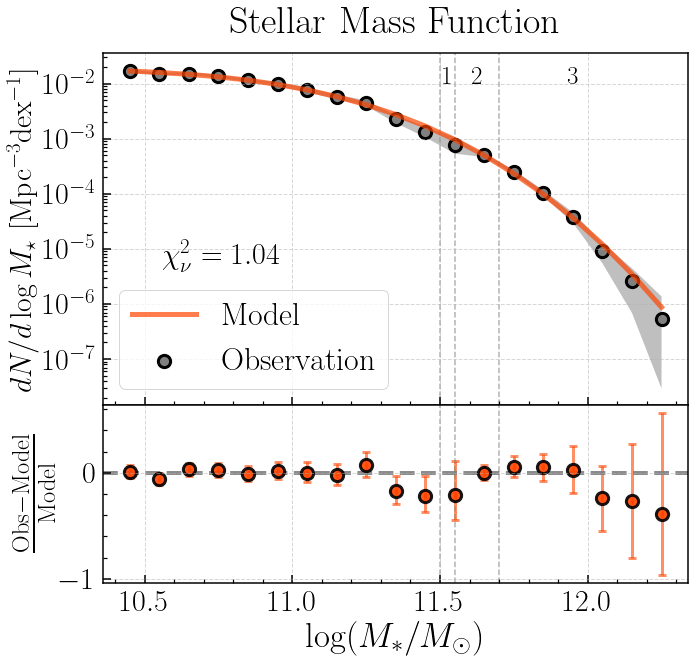

In [9]:
fig_1 = plt.figure(figsize=(9.5, 9.2))
fig_1.suptitle(r'$\rm Stellar\ Mass\ Function$', fontsize=38, x=0.57)

# Setup the three panels
ax1 = fig_1.add_axes([0.142, 0.38, 0.855, 0.53])
ax2 = fig_1.add_axes([0.142, 0.11, 0.855, 0.27])

ax1.fill_between(
    smf['smf_centers'], smf['obs_smf'] - smf['obs_err'][0], smf['obs_smf'] + smf['obs_err'][1],
    alpha=0.5, facecolor='grey'
)

ax1.scatter(smf['smf_centers'], smf['obs_smf'], marker='o', s=150, facecolor='grey', edgecolor='k',
            linewidth=3, label=r"$\rm Observation$")

ax1.plot(smf['smf_centers'], smf['sim_smf'], label=r"$\rm Model$", linewidth=5, alpha=0.7,
         color='orangered', zorder=100)

ax1.legend(loc='lower left', fontsize=32)

ax1.set_yscale("log", nonpositive='clip')
ax1.set_ylabel(r"$dN/d \log M_{\star}\ [{\rm Mpc^{-3} dex^{-1}}]$", fontsize=30)

ax1.axhline(0.0, linewidth=3.0, color='k', linestyle='--', zorder=0, alpha=0.9)

#ax2.set_xscale("log", nonpositive='clip')

ax2.axhline(0.0, linewidth=4.0, color='grey', linestyle='--', zorder=0, alpha=0.9)

ax2.errorbar(smf['smf_centers'], (smf['obs_smf'] - smf['sim_smf']) / smf['sim_smf'], 
             yerr=(smf['obs_err'] / smf['sim_smf']),
             ecolor='orangered', color='orangered', alpha=0.6, capsize=4, 
             capthick=3, elinewidth=3, label='__no_label__', fmt='.', zorder=0)
ax2.scatter(smf['smf_centers'], (smf['obs_smf'] - smf['sim_smf']) / smf['sim_smf'],
            marker='o', s=150, facecolor='orangered', edgecolor='k', alpha=0.9, linewidth=3)

ax2.set_xlabel(r"${\rm log}(M_{\ast} / M_{\odot})$", fontsize=35)
ax2.set_ylabel(r"$\frac{{\rm Obs} - {\rm Model}}{\rm Model}$", fontsize=35)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    
ax1.axvline(11.50, c='grey', zorder=0, linestyle='--', alpha=0.6)
ax1.axvline(11.55, c='grey', zorder=0, linestyle='--', alpha=0.6)
ax1.axvline(11.70, c='grey', zorder=0, linestyle='--', alpha=0.6)

ax1.text(11.51, 0.01, r"$1$", fontsize=25)
ax1.text(11.61, 0.01, r"$2$", fontsize=25)
ax1.text(11.93, 0.01, r"$3$", fontsize=25)

ax1.text(0.1, 0.40, r"$\chi_{\nu}^2=1.04$", fontsize=30, transform=ax1.transAxes)

ax2.axvline(11.50, c='grey', zorder=0, linestyle='--', alpha=0.6)
ax2.axvline(11.55, c='grey', zorder=0, linestyle='--', alpha=0.6)
ax2.axvline(11.70, c='grey', zorder=0, linestyle='--', alpha=0.6)

Text(0, 0.5, '${\\rm Obs}/{\\rm Model}$')

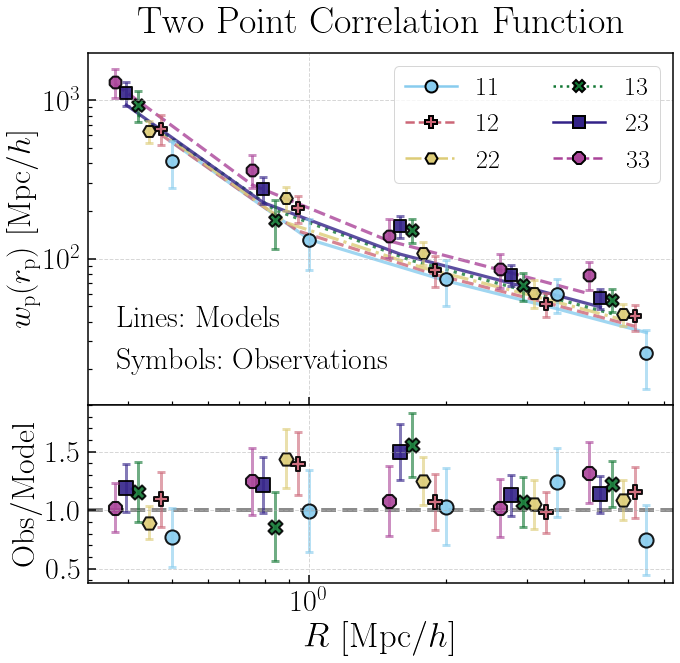

In [10]:
fig_2 = plt.figure(figsize=(9.5, 9.2))
fig_2.suptitle(r'$\rm Two\ Point\ Correlation\ Function$', fontsize=38, x=0.57)

# Setup the three panels
ax1 = fig_2.add_axes([0.14, 0.38, 0.855, 0.53])
ax2 = fig_2.add_axes([0.14, 0.11, 0.855, 0.27])

ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')

ax1.set_ylabel(r"$w_{\rm p}(r_{\rm p})\ [{\rm Mpc}/h]$", fontsize=32)

legend_handles = []
for i in range(len(clustering['obs_clust'])):
    x_plot = clustering["x"] / 1.06 ** i
    ax1.plot(x_plot, clustering['sim_clust'][i], c=cluster_colors[i], linestyle=clustering_lstyle[i],
             linewidth=3.2, alpha=0.8, zorder=0)
    
    ax1.errorbar(
        x_plot, clustering["obs_clust"][i], yerr=clustering["obs_clust_errs"][i],
        ecolor=cluster_colors[i], color='none', alpha=0.6, capsize=4, 
        capthick=3, elinewidth=3, label='__no_label__', fmt='.', zorder=1
    )
    ax1.scatter(x_plot, clustering["obs_clust"][i], marker=clustering_marker[i], 
                s=160, linewidth=2.0, facecolor=cluster_colors[i], edgecolor='k', alpha=0.9)
    
    lh = Line2D([], [], label=clustering_labels[i], color=cluster_colors[i], 
                linewidth=2.5, marker=clustering_marker[i], linestyle=clustering_lstyle[i],
                markerfacecolor=cluster_colors[i],
                markeredgecolor='k', markeredgewidth=2.0, markersize=12)
    legend_handles.append(lh)
    
ax1.text(0.05, 0.10, r"\rm Symbols:\ Observations", fontsize=30, transform=ax1.transAxes)
ax1.text(0.05, 0.22, r"\rm Lines:\ Models", fontsize=30, transform=ax1.transAxes)

ax1.legend(handles=legend_handles, loc='upper right', fontsize=26, ncol=2)
    
ax2.axhline(1.0, linewidth=4.0, color='grey', linestyle='--', zorder=0, alpha=0.9)


for i in range(len(clustering['obs_clust'])):
    x_plot = clustering["x"] / 1.06 ** i
    ax2.errorbar(
        x_plot, clustering["obs_clust"][i] / clustering["sim_clust"][i], 
        yerr=clustering["obs_clust_errs"][i] / clustering["sim_clust"][i],
        ecolor=cluster_colors[i], color='none', alpha=0.6, capsize=4, 
        capthick=3, elinewidth=3, label='__no_label__', fmt='.', zorder=1
    )
    ax2.scatter(x_plot, clustering["obs_clust"][i] / clustering["sim_clust"][i], 
                marker=clustering_marker[i], linewidth=2,
                s=200, facecolor=cluster_colors[i], edgecolor='k', alpha=0.9)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
    
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax2.set_xscale("log", nonpositive='clip')
ax2.set_xlabel(r"$R\ [{\rm Mpc}/h]$", fontsize=35)
ax2.set_ylabel(r"${\rm Obs}/{\rm Model}$", fontsize=32)

In [140]:
fig_1.savefig('figure/fig_B1a.png', dpi=120)
fig_2.savefig('figure/fig_B1a.png', dpi=120)

In [141]:
fig_1.savefig('figure/fig_B1b.pdf', dpi=120)
fig_2.savefig('figure/fig_B1b.pdf', dpi=120)